<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:180%;
           font-family:Oswald;
           letter-spacing:0.7px">

<p style= "padding: 5px;
                  color:white;">
    
    
<p style = "text-align:center;"> Sentiment Analysis on mother's Day (NLP) 😁😏😣😌😪😐🥱

</p>
</div>
    

# Introduction :

- Sentiment analysis is the process of analyzing digital text to determine if the emotional tone of the message is positive, negative, or neutral. Today, companies have large volumes of text data like emails, customer support chat transcripts, social media comments, and reviews we can draw insights from and understand human behaviour towards people, products, services ideas and concepts .

# Primary Objectives: 

- find out top occuring words in the data
- visualize relationships between features
- build predictive models and pipeline for automation

# About dataset:

- This dataset consists of tweets (comments) , authors and predefined emotions abouts mother's day



In [1]:
import pandas as pd
import numpy as np
import matplotlib .pyplot as plt
import seaborn as sns
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import warnings
import os
import spacy
from spacy.lang.en.stop_words import STOP_WORDS 
nlp = spacy.load("en_core_web_sm")
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.decomposition import LatentDirichletAllocation
import warnings
import os
import re
import string
from tqdm.notebook import tqdm
import nltk
from spellchecker import SpellChecker
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from wordcloud import WordCloud, ImageColorGenerator 
from nltk.corpus import stopwords
import random 


warnings.filterwarnings("ignore")

df = pd.read_csv("text_emotion.csv")
df.head(20)


tweet_id   sentiment           author  \
0   1956967341       empty       xoshayzers   
1   1956967666     sadness        wannamama   
2   1956967696     sadness        coolfunky   
3   1956967789  enthusiasm      czareaquino   
4   1956968416     neutral        xkilljoyx   
5   1956968477       worry    xxxPEACHESxxx   
6   1956968487     sadness         ShansBee   
7   1956968636       worry         mcsleazy   
8   1956969035     sadness      nic0lepaula   
9   1956969172     sadness       Ingenue_Em   
10  1956969456     neutral       feinyheiny   
11  1956969531       worry     dudeitsmanda   
12  1956970047     sadness         Danied32   
13  1956970424     sadness          Samm_xo   
14  1956970860    surprise     okiepeanut93   
15  1956971077     sadness           Sim_34   
16  1956971170        love     poppygallico   
17  1956971206     sadness  brokenangel1982   
18  1956971473       worry            LCJ82   
19  1956971586     sadness          cleepow   

                                              content  
0   @tiffanylue i know  i was listenin to bad habi...  
1   Layin n bed with a headache  ughhhh...waitin o...  
2                 Funeral ceremony...gloomy friday...  
3                wants to hang out with friends SOON!  
4   @dannycastillo We want to trade with someone w...  
5   Re-pinging @ghostridah14: why didn't you go to...  
6   I should be sleep, but im not! thinking about ...  
7                Hmmm. http://www.djhero.com/ is down  
8             @charviray Charlene my love. I miss you  
9          @kelcouch I'm sorry  at least it's Friday?  
10                                   cant fall asleep  
11                            Choked on her retainers  
12  Ugh! I have to beat this stupid song to get to...  
13  @BrodyJenner if u watch the hills in london u ...  
14                                       Got the news  
15      The storm is here and the electricity is gone  
16                               @annarosekerr agreed  
17  So sleepy again and it's not even that late. I...  
18  @PerezHilton lady gaga tweeted about not being...  
19  How are YOU convinced that I have always wante...

In [2]:
# remove whitespaces
df.columns = df.columns.str.strip()
print (df .columns)

Index(['tweet_id', 'sentiment', 'author', 'content'], dtype='object')


In [3]:
# drop unncessary column
df = df.drop(["tweet_id"], axis=1)

In [4]:
#show data schema
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  40000 non-null  object
 1   author     40000 non-null  object
 2   content    40000 non-null  object
dtypes: object(3)
memory usage: 937.6+ KB


In [5]:
# sample of data
df.sample()

sentiment      author                                            content
24486      hate  liljenn618  @curtistrichel thank you for being cabbie this...

In [6]:
# get unique values
df.nunique()

sentiment       13
author       33871
content      39827
dtype: int64

In [7]:
languages = stopwords.fileids()
# Print the number of supported languages
print("Number of supported languages:", len(languages))
# Print the list of supported languages 
print("Supported languages:", languages)

Number of supported languages: 29
Supported languages: ['arabic', 'azerbaijani', 'basque', 'bengali', 'catalan', 'chinese', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hebrew', 'hinglish', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'slovene', 'spanish', 'swedish', 'tajik', 'turkish']


In [8]:
from nltk.tokenize import TweetTokenizer

In [9]:
english_stopwords = stopwords.words("english") 
hinglish_stopwords = stopwords.words("hinglish")

In [10]:
def clean_content(contents):
    # Remove URLs, hashtags, mentions, and special characters 
    contents = re.sub(r"http\S+|www\S+|@\w+|#\w+", "", contents) 
    contents = re.sub(r"[^\w\s]", "", contents)
    # Tokenize the tweet0
    tokenizer = TweetTokenizer(preserve_case=False, reduce_len=True, strip_handles=True) 
    tokens = tokenizer.tokenize(contents)
    # Remove stopwords for English and Hinglish
    tokens = [token for token in tokens if token not in english_stopwords and token not in hinglish_stopwords]
    # Remove punctuation and convert to lowercase
    tokens = [token.translate(str.maketrans('', '', string.punctuation)) for token in tokens] 
    tokens = [token.lower() for token in tokens]
    
     # Join tokens back into a string 
    cleaned_content = ' '.join(tokens)
    return cleaned_content

In [11]:
# add a seperate column for cleaned data
df["Cleaned_contents"] = df["content"].apply(clean_content)

In [12]:
df.head()

sentiment       author                                            content  \
0       empty   xoshayzers  @tiffanylue i know  i was listenin to bad habi...   
1     sadness    wannamama  Layin n bed with a headache  ughhhh...waitin o...   
2     sadness    coolfunky                Funeral ceremony...gloomy friday...   
3  enthusiasm  czareaquino               wants to hang out with friends SOON!   
4     neutral    xkilljoyx  @dannycastillo We want to trade with someone w...   

                              Cleaned_contents  
0  listenin habit earlier started freakin part  
1        layin n bed headache ughhhwaitin call  
2                funeral ceremonygloomy friday  
3                                 hang friends  
4                        trade houston tickets

In [13]:
# remove Capital letters
def clean_text(text): 
    text = text.lower() 
    return text.strip()

In [14]:
# apply cleaned data
df.Cleaned_contents = df.Cleaned_contents.apply(lambda x: clean_text(x))

In [15]:
# remove all non-alphanumeric characters
def tokenization(text):
    tokens = re.split("W+",text) 
    return tokens

In [16]:
# apply cleaned data
df.Cleaned_contents = df.Cleaned_contents.apply(lambda x: tokenization(x))

In [17]:
# import required libraries for lematizer
from nltk.stem import WordNetLemmatizer 
wordnet_lemmatizer = WordNetLemmatizer()

In [18]:
# break words to their root meaning
def lemmatizer(text):
    lemm_text = "".join([wordnet_lemmatizer.lemmatize(word) for word in text]) 
    return lemm_text

In [19]:
#apply lematized data
df.Cleaned_contents = df.Cleaned_contents.apply(lambda x: lemmatizer(x))

In [20]:
# remove unnecessary digits
def remove_digits(text):
    clean_text = re.sub(r"\b[0-9]+\b\s*", "", text) 
    return(text)

In [21]:
# apply clean data
df.Cleaned_contents= df.Cleaned_contents.apply(lambda x: remove_digits(x))

In [22]:
# remove unnecessary digits for sample text
def remove_digits1(sample_text):
    clean_text = " ".join([w for w in sample_text.split() if not w.isdigit()]) 
    return(clean_text)

In [23]:
# detect languages difference if any
from langdetect import detect
def detect_language(text): 
    try:
        lang = detect(text) 
        return lang
    except:
        return None
df["Language"] = df["Cleaned_contents"].apply(detect_language)

In [24]:
df.head()

sentiment       author                                            content  \
0       empty   xoshayzers  @tiffanylue i know  i was listenin to bad habi...   
1     sadness    wannamama  Layin n bed with a headache  ughhhh...waitin o...   
2     sadness    coolfunky                Funeral ceremony...gloomy friday...   
3  enthusiasm  czareaquino               wants to hang out with friends SOON!   
4     neutral    xkilljoyx  @dannycastillo We want to trade with someone w...   

                              Cleaned_contents Language  
0  listenin habit earlier started freakin part       en  
1        layin n bed headache ughhhwaitin call       en  
2                funeral ceremonygloomy friday       es  
3                                 hang friends       da  
4                        trade houston tickets       en

In [25]:
# create copy dataset
df1 = df.copy()

In [26]:
# create new column with containing cleaned content and language
df1["english_contents"] = df[df["Language"] == "en"]["Cleaned_contents"]

In [27]:
df1

sentiment         author  \
0           empty     xoshayzers   
1         sadness      wannamama   
2         sadness      coolfunky   
3      enthusiasm    czareaquino   
4         neutral      xkilljoyx   
...           ...            ...   
39995     neutral  showMe_Heaven   
39996        love       drapeaux   
39997        love       JenniRox   
39998   happiness       ipdaman1   
39999        love    Alpharalpha   

                                                 content  \
0      @tiffanylue i know  i was listenin to bad habi...   
1      Layin n bed with a headache  ughhhh...waitin o...   
2                    Funeral ceremony...gloomy friday...   
3                   wants to hang out with friends SOON!   
4      @dannycastillo We want to trade with someone w...   
...                                                  ...   
39995                                   @JohnLloydTaylor   
39996                     Happy Mothers Day  All my love   
39997  Happy Mother's Day to all the mommies out ther...   
39998  @niariley WASSUP BEAUTIFUL!!! FOLLOW ME!!  PEE...   
39999  @mopedronin bullet train from tokyo    the gf ...   

                                        Cleaned_contents Language  \
0            listenin habit earlier started freakin part       en   
1                  layin n bed headache ughhhwaitin call       en   
2                          funeral ceremonygloomy friday       es   
3                                           hang friends       da   
4                                  trade houston tickets       en   
...                                                  ...      ...   
39995                                                        None   
39996                             happy mothers day love       en   
39997  happy mothers day mommies woman man long youre...       en   
39998  wassup beautiful follow peep hit singles wwwmy...       en   
39999  bullet train tokyo gf visiting japan thursday ...       en   

                                        english_contents  
0            listenin habit earlier started freakin part  
1                  layin n bed headache ughhhwaitin call  
2                                                    NaN  
3                                                    NaN  
4                                  trade houston tickets  
...                                                  ...  
39995                                                NaN  
39996                             happy mothers day love  
39997  happy mothers day mommies woman man long youre...  
39998  wassup beautiful follow peep hit singles wwwmy...  
39999  bullet train tokyo gf visiting japan thursday ...  

[40000 rows x 6 columns]

In [28]:
# dropna values
df1 = df1.dropna()

In [29]:
df1

sentiment        author  \
0          empty    xoshayzers   
1        sadness     wannamama   
4        neutral     xkilljoyx   
6        sadness      ShansBee   
9        sadness    Ingenue_Em   
...          ...           ...   
39994  happiness  courtside101   
39996       love      drapeaux   
39997       love      JenniRox   
39998  happiness      ipdaman1   
39999       love   Alpharalpha   

                                                 content  \
0      @tiffanylue i know  i was listenin to bad habi...   
1      Layin n bed with a headache  ughhhh...waitin o...   
4      @dannycastillo We want to trade with someone w...   
6      I should be sleep, but im not! thinking about ...   
9             @kelcouch I'm sorry  at least it's Friday?   
...                                                  ...   
39994                      Succesfully following Tayla!!   
39996                     Happy Mothers Day  All my love   
39997  Happy Mother's Day to all the mommies out ther...   
39998  @niariley WASSUP BEAUTIFUL!!! FOLLOW ME!!  PEE...   
39999  @mopedronin bullet train from tokyo    the gf ...   

                                        Cleaned_contents Language  \
0            listenin habit earlier started freakin part       en   
1                  layin n bed headache ughhhwaitin call       en   
4                                  trade houston tickets       en   
6      sleep im friend hes married damn amp 2 scandalous       en   
9                                        im sorry friday       en   
...                                                  ...      ...   
39994                                  succesfully tayla       en   
39996                             happy mothers day love       en   
39997  happy mothers day mommies woman man long youre...       en   
39998  wassup beautiful follow peep hit singles wwwmy...       en   
39999  bullet train tokyo gf visiting japan thursday ...       en   

                                        english_contents  
0            listenin habit earlier started freakin part  
1                  layin n bed headache ughhhwaitin call  
4                                  trade houston tickets  
6      sleep im friend hes married damn amp 2 scandalous  
9                                        im sorry friday  
...                                                  ...  
39994                                  succesfully tayla  
39996                             happy mothers day love  
39997  happy mothers day mommies woman man long youre...  
39998  wassup beautiful follow peep hit singles wwwmy...  
39999  bullet train tokyo gf visiting japan thursday ...  

[26946 rows x 6 columns]

In [30]:
#  get length of data
df1["english_content_length"] = df1["english_contents"].str.len()

In [31]:
# check schema of created dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26946 entries, 0 to 39999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   sentiment               26946 non-null  object
 1   author                  26946 non-null  object
 2   content                 26946 non-null  object
 3   Cleaned_contents        26946 non-null  object
 4   Language                26946 non-null  object
 5   english_contents        26946 non-null  object
 6   english_content_length  26946 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 1.6+ MB


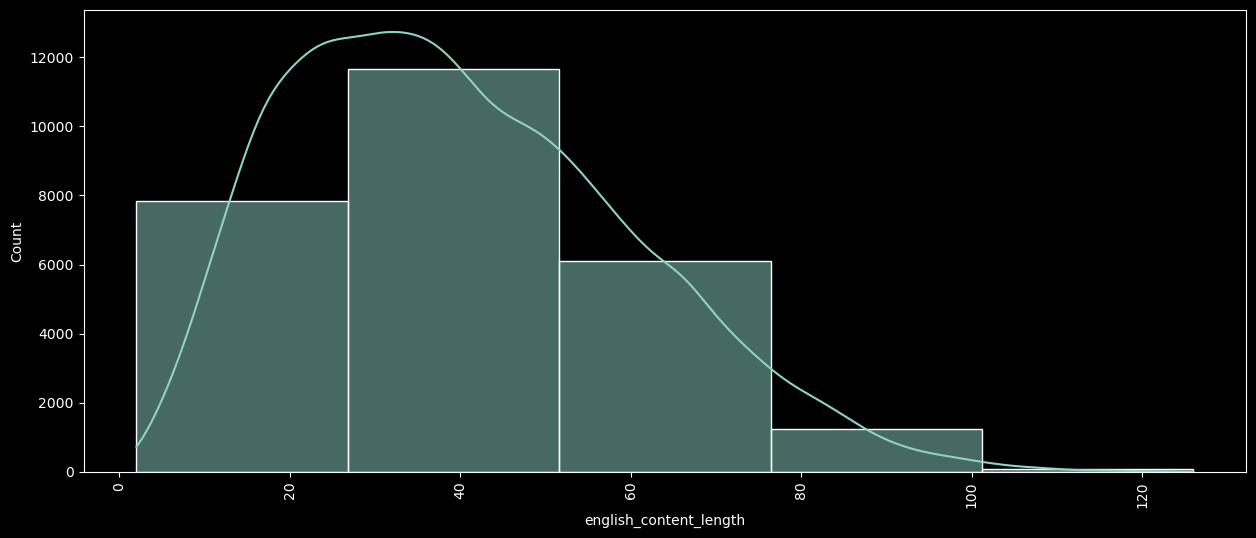

In [32]:
plt.style.use("dark_background")
# visualize length
plt.figure(figsize=(15,6))
sns.histplot(df1["english_content_length"], kde = True, bins = 5, palette = 'hls') 
plt.xticks(rotation = 90)
plt.show()

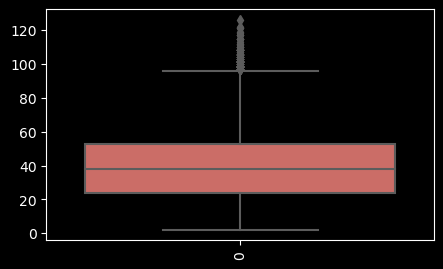

In [33]:
plt.style.use("dark_background")
# visualize length
plt.figure(figsize=(5,3))
sns.boxplot(df1["english_content_length"], palette = "hls") 
plt.xticks(rotation = 90)
plt.show()

In [34]:
# checking for missing values
df1["english_content_length"].isna().sum()

0

In [35]:
# define spell checkers
spell = SpellChecker()

In [36]:
# define sentiment labels
def label_sentiment(x:float):
    if x < -0.05 : return "negative" 
    if x > 0.35 : return "positive" 
    return "neutral"

In [37]:
# define sentiment intensity
sia = SIA()

In [38]:
# get sentiment scores and overall sentiments
df1["sentiment one"] = [sia.polarity_scores(x)["compound"] for x in tqdm(df1["english_contents"])] 
df1["overall_sentiment"] = df1["sentiment one"].apply(label_sentiment);

  0%|          | 0/26946 [00:00<?, ?it/s]

In [39]:
# view first roll of dataset
df1.head(1)

sentiment      author                                            content  \
0     empty  xoshayzers  @tiffanylue i know  i was listenin to bad habi...   

                              Cleaned_contents Language  \
0  listenin habit earlier started freakin part       en   

                              english_contents  english_content_length  \
0  listenin habit earlier started freakin part                      43   

   sentiment one overall_sentiment  
0            0.0           neutral

In [40]:
# create new data frame for emotion sentiments
df0=df1[["sentiment" ,"Cleaned_contents" ,"english_content_length","sentiment one","overall_sentiment"]]

In [41]:
df0

sentiment                                   Cleaned_contents  \
0          empty        listenin habit earlier started freakin part   
1        sadness              layin n bed headache ughhhwaitin call   
4        neutral                              trade houston tickets   
6        sadness  sleep im friend hes married damn amp 2 scandalous   
9        sadness                                    im sorry friday   
...          ...                                                ...   
39994  happiness                                  succesfully tayla   
39996       love                             happy mothers day love   
39997       love  happy mothers day mommies woman man long youre...   
39998  happiness  wassup beautiful follow peep hit singles wwwmy...   
39999       love  bullet train tokyo gf visiting japan thursday ...   

       english_content_length  sentiment one overall_sentiment  
0                          43         0.0000           neutral  
1                          37         0.0000           neutral  
4                          21         0.0000           neutral  
6                          49        -0.4404          negative  
9                          15        -0.0772          negative  
...                       ...            ...               ...  
39994                      17         0.0000           neutral  
39996                      22         0.8360          positive  
39997                      56         0.5719          positive  
39998                      77         0.5994          positive  
39999                      81         0.0000           neutral  

[26946 rows x 5 columns]

In [42]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26946 entries, 0 to 39999
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   sentiment               26946 non-null  object 
 1   Cleaned_contents        26946 non-null  object 
 2   english_content_length  26946 non-null  int64  
 3   sentiment one           26946 non-null  float64
 4   overall_sentiment       26946 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 2.2+ MB


In [43]:
# Sentiment Analysis Metrics
overall_sentiment_counts = df0["overall_sentiment"].value_counts() 
average_sentiment_score = df0["sentiment one"].mean() 
avg_english_content_length = df0["english_content_length"].mean()
# Categorical Metrics
sentiment_categories = df["sentiment"].value_counts()
sentiment_distribution_1 = df0.groupby("sentiment one")["overall_sentiment"].value_counts(normalize=True)


# Print the calculated metrics
print("Sentiment Analysis Metrics:",overall_sentiment_counts )
print("Average Sentiment Score:", average_sentiment_score) 
print("avg_english_content_length:", avg_english_content_length) 

print("\nCategorical Metrics -sentiment_categories :")
print(sentiment_categories)
print("\nCategorical Metrics by overall_sentiment")
print(sentiment_distribution_1)


Sentiment Analysis Metrics: neutral     10750
positive     8967
negative     7229
Name: overall_sentiment, dtype: int64
Average Sentiment Score: 0.10393619832257109
avg_english_content_length: 40.058004898686264

Categorical Metrics -sentiment_categories :
neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64

Categorical Metrics by overall_sentiment
sentiment one  overall_sentiment
-0.9726        negative             1.0
-0.9648        negative             1.0
-0.9590        negative             1.0
-0.9559        negative             1.0
-0.9493        negative             1.0
                                   ... 
 0.9678        positive             1.0
 0.9698        positive             1.0
 0.9716        positive             1.0
 0.9723        positive        

In [44]:
df0["Word_Count"] = df0["Cleaned_contents"].apply(lambda x: len(x.split())) 
df0["Char_Count"] = df0["Cleaned_contents"].apply(len)

In [45]:
#pip upgrade scikit-learn

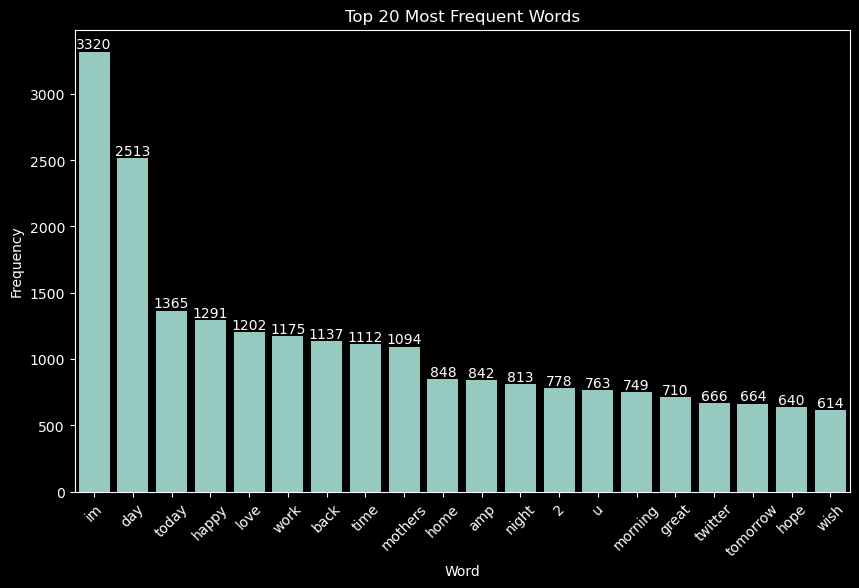

In [46]:
plt.style.use("dark_background")
# Word Frequency Analysis
from collections import Counter
word_frequency = Counter(" ".join(df0["Cleaned_contents"]).split()).most_common(20)
plt.figure(figsize=(10, 6))
color = sns.color_palette()[0]
ax = sns.barplot(x=[word[0] for word in word_frequency], y=[word[1] for word in word_frequency], color=color)
ax.bar_label(ax.containers[0], fmt="%.0f", label_type="edge")
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.title("Top 20 Most Frequent Words")
plt.xticks(rotation=45)
plt.show()

 # Emotion Detection
Identifying emotions in Sentiments. The sentiment property of the TextBlob object to retrieve 
the sentiment scores which includes polarity (a value between -1 and 1 indicating the sentiment) and 
subjectivity (a value between 0 and 1 indicating the subjectivity of the text). Emotion Polarity: 
Emotion polarity measures the sentiment or emotional tone of a text. It indicates whether the 
text expresses a positive, negative, or neutral emotion. In the code provided, the polarity scores 
are obtained using the SentimentIntensityAnalyzer from NLTK. The polarity scores include values 
for positive, negative, and neutral sentiment. The sentiment polarity can help identify the overall 
sentiment or emotional tone of the feedback text. Emotion Subjectivity: Emotion subjectivity 
measures the degree of subjectivity or objectivity in the expression of emotions in a text. It 
indicates how much the text relies on personal opinions, beliefs, or experiences rather than factual 
or objective information. A higher subjectivity score suggests that the text is more influenced by 
personal perspectives or experiences.

In [47]:
from textblob import TextBlob

In [48]:
def calculate_emotions(text):
    blob = TextBlob(text)
    emotion_scores = blob.sentiment.polarity, blob.sentiment.subjectivity 
    return emotion_scores
# Apply emotion analysis to the feedback text
df0["Emotion_Scores"] = df0["sentiment"].apply(calculate_emotions)
# Extract emotion scores for each emotion category
df0["Emotion_Polarity"] = df0["Emotion_Scores"].apply(lambda x: x[0])
df0["Emotion_Subjectivity"] = df0["Emotion_Scores"].apply(lambda x: x[1])
# assign emotion labels based on polarity values
df0["Emotion_Label"] = df0["Emotion_Polarity"].apply(lambda x: "Positive" if x >0 else "Negative" if x < 0 else "Neutral")
# the resulting dataframe with emotion scores and labels
df0[["sentiment", "Emotion_Polarity", "Emotion_Subjectivity","Emotion_Label"]].head()

sentiment  Emotion_Polarity  Emotion_Subjectivity Emotion_Label
0     empty              -0.1                   0.5      Negative
1   sadness               0.0                   0.0       Neutral
4   neutral               0.0                   0.0       Neutral
6   sadness               0.0                   0.0       Neutral
9   sadness               0.0                   0.0       Neutral

In [49]:
# get emotion_sentiment
df0.rename(columns={df.columns[0] : "Emotion_sentiment"} ,inplace = True)
df0.head()

Emotion_sentiment                                   Cleaned_contents  \
0             empty        listenin habit earlier started freakin part   
1           sadness              layin n bed headache ughhhwaitin call   
4           neutral                              trade houston tickets   
6           sadness  sleep im friend hes married damn amp 2 scandalous   
9           sadness                                    im sorry friday   

   english_content_length  sentiment one overall_sentiment  Word_Count  \
0                      43         0.0000           neutral           6   
1                      37         0.0000           neutral           6   
4                      21         0.0000           neutral           3   
6                      49        -0.4404          negative           9   
9                      15        -0.0772          negative           3   

   Char_Count Emotion_Scores  Emotion_Polarity  Emotion_Subjectivity  \
0          43    (-0.1, 0.5)              -0.1                   0.5   
1          37     (0.0, 0.0)               0.0                   0.0   
4          21     (0.0, 0.0)               0.0                   0.0   
6          49     (0.0, 0.0)               0.0                   0.0   
9          15     (0.0, 0.0)               0.0                   0.0   

  Emotion_Label  
0      Negative  
1       Neutral  
4       Neutral  
6       Neutral  
9       Neutral

# Emotion ANALYSIS EDA📊

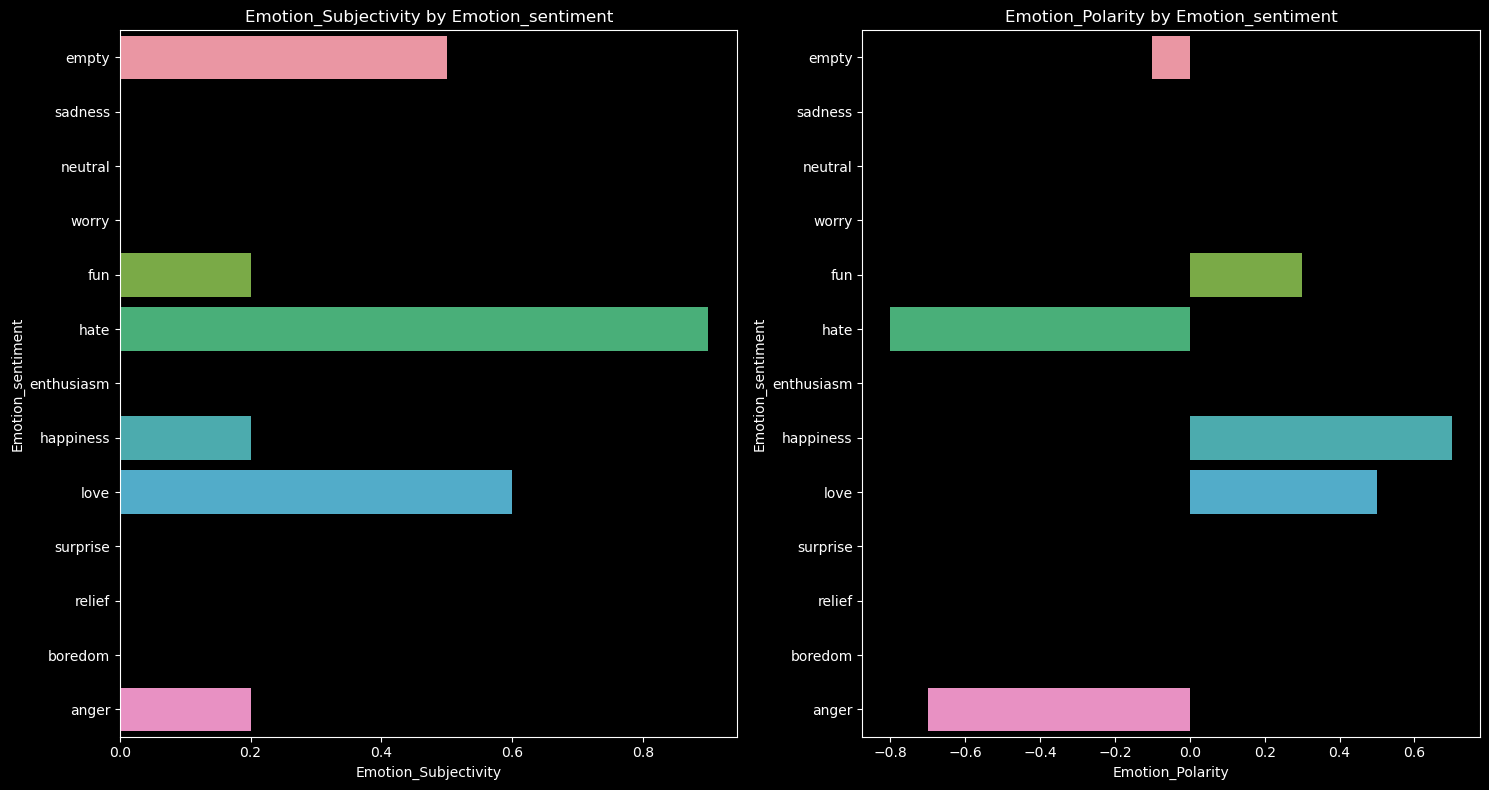

In [50]:
# plot style
plt.style.use("dark_background")
fig, axes = plt.subplots(1, 2,figsize= (15,8))

#create plot in each subplot
sns.barplot(df0, x="Emotion_Subjectivity", y="Emotion_sentiment", ax=axes[0])
sns.barplot(df0, x="Emotion_Polarity", y="Emotion_sentiment", ax=axes[1])
ax=axes[0].set_title("Emotion_Subjectivity by Emotion_sentiment")
ax= axes[1].set_title("Emotion_Polarity by Emotion_sentiment")
fig.tight_layout()
plt.show()

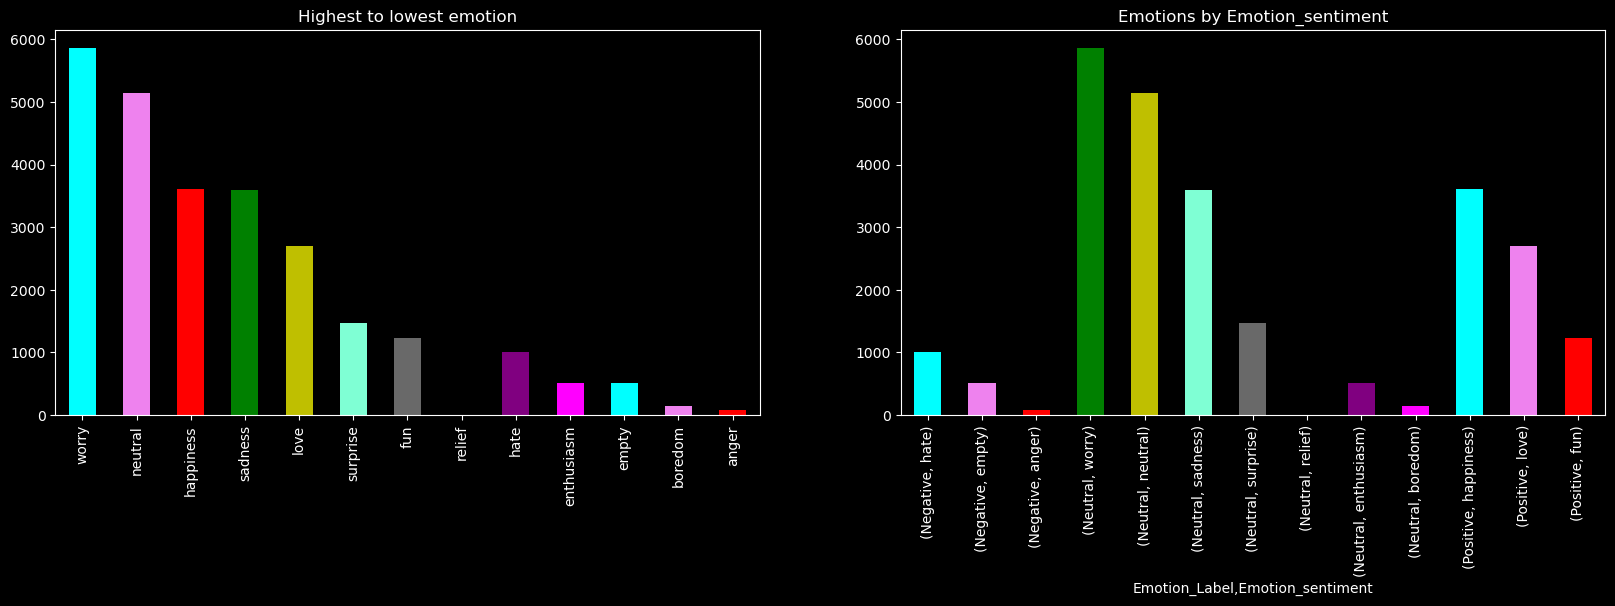

In [51]:
# plot style
plt.style.use("dark_background")
f,ax = plt.subplots (1,2, figsize = (20 ,5))


df0["Emotion_sentiment"].value_counts().plot(ax = ax [0], kind= "bar" , color = ["cyan","violet","r", "g","y","aquamarine","dimgray", "black","purple","magenta" ])
ax[0].set_title("Highest to lowest emotion")
df0.groupby(["Emotion_Label"])["Emotion_sentiment"].value_counts().plot(ax = ax [1], kind= "bar",color = ["cyan","violet","r", "g","y","aquamarine","dimgray","black","purple","magenta"])
ax[1].set_title("Emotions by Emotion_sentiment")
plt.show ()

In [52]:

df0.head(1)

Emotion_sentiment                             Cleaned_contents  \
0             empty  listenin habit earlier started freakin part   

   english_content_length  sentiment one overall_sentiment  Word_Count  \
0                      43            0.0           neutral           6   

   Char_Count Emotion_Scores  Emotion_Polarity  Emotion_Subjectivity  \
0          43    (-0.1, 0.5)              -0.1                   0.5   

  Emotion_Label  
0      Negative

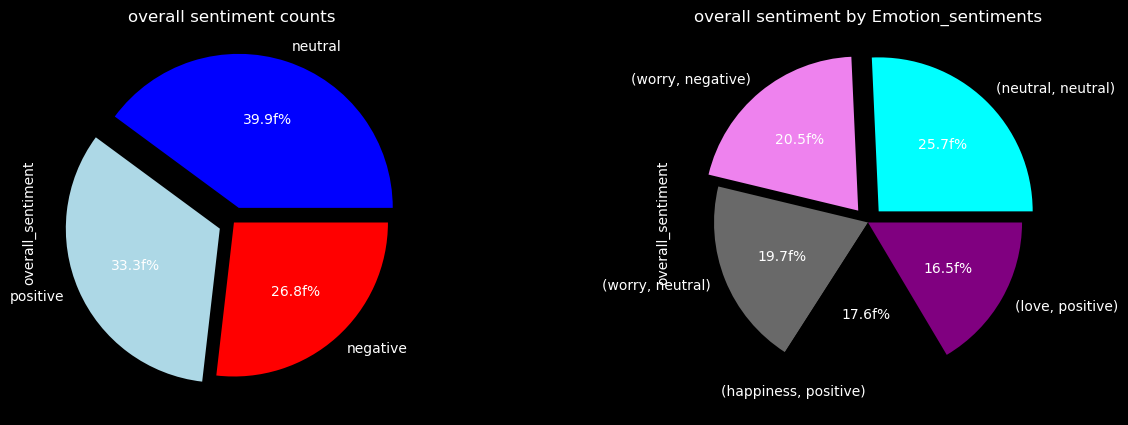

In [53]:
# plot style
plt.style.use("dark_background")

f,ax = plt.subplots (1,2,figsize = (15 ,5))
df0["overall_sentiment"].value_counts().plot.pie(ax = ax [0], autopct ="%1.1ff%%" ,colors = ["b","lightblue","r" ,"g" ,"y"],explode =[0.1,0.1,0] )
df0.groupby(["Emotion_sentiment"])["overall_sentiment"].value_counts().sort_values(ascending= False)[:5].plot.pie(ax = ax [1], autopct ="%1.1ff%%" ,colors = ["cyan","violet","dimgray" ,"black" ,"purple"],explode =[0.1,0.1,0,0,0])
ax[0].set_title("overall sentiment counts ")
ax[1].set_title("overall sentiment by Emotion_sentiments")
plt.show ()

In [54]:
df0.head(1)

Emotion_sentiment                             Cleaned_contents  \
0             empty  listenin habit earlier started freakin part   

   english_content_length  sentiment one overall_sentiment  Word_Count  \
0                      43            0.0           neutral           6   

   Char_Count Emotion_Scores  Emotion_Polarity  Emotion_Subjectivity  \
0          43    (-0.1, 0.5)              -0.1                   0.5   

  Emotion_Label  
0      Negative

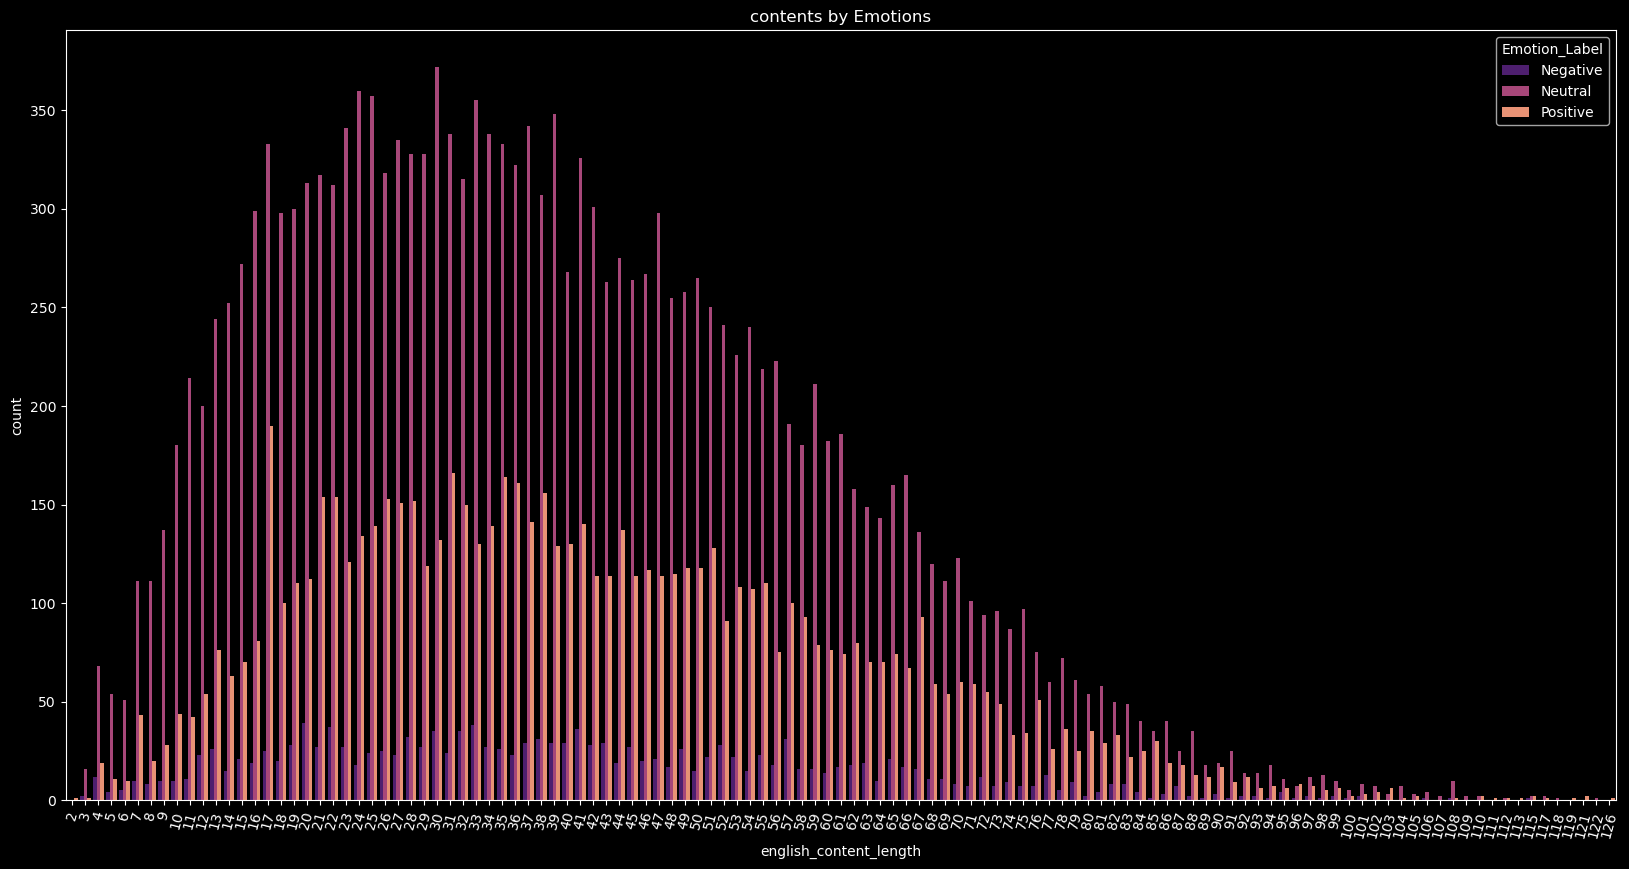

In [55]:

#required plot size
plt.figure(figsize=(20,10))
# plot visualization
ax= sns.countplot(x="english_content_length",hue="Emotion_Label",data = df0 ,palette="magma")
#set a title
ax.set_title("contents by Emotions")
# create a rotation pattern
plt.xticks(rotation=75)
# show plot
plt.show()

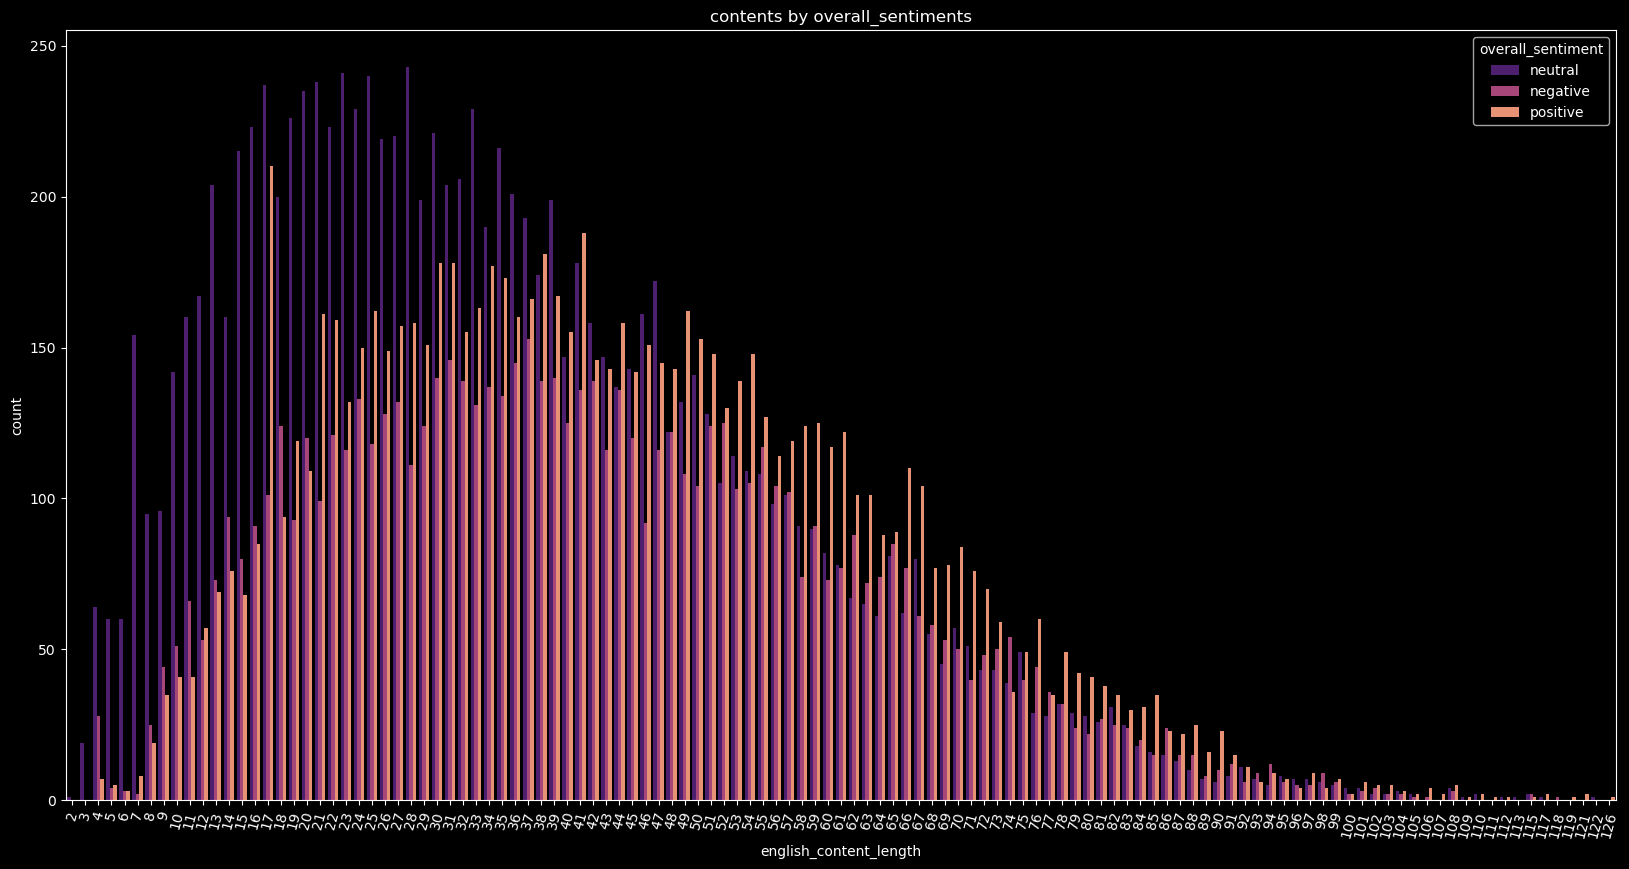

In [56]:
plt.style.use("dark_background")
#required plot size
plt.figure(figsize=(20,10))
# plot visualization
ax= sns.countplot(x="english_content_length",hue="overall_sentiment",data = df0 ,palette="magma")
#set a title
ax.set_title("contents by overall_sentiments")
# create a rotation pattern
plt.xticks(rotation=75)
#ax.bar_label(ax.containers[0],fmt="%.0f",label_type="edge")
#ax.bar_label(ax.containers[1],fmt="%.0f",label_type="edge")
# show plot
plt.show()

In [57]:
# show data schema
df0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26946 entries, 0 to 39999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Emotion_sentiment       26946 non-null  object 
 1   Cleaned_contents        26946 non-null  object 
 2   english_content_length  26946 non-null  int64  
 3   sentiment one           26946 non-null  float64
 4   overall_sentiment       26946 non-null  object 
 5   Word_Count              26946 non-null  int64  
 6   Char_Count              26946 non-null  int64  
 7   Emotion_Scores          26946 non-null  object 
 8   Emotion_Polarity        26946 non-null  float64
 9   Emotion_Subjectivity    26946 non-null  float64
 10  Emotion_Label           26946 non-null  object 
dtypes: float64(3), int64(3), object(5)
memory usage: 3.5+ MB


In [58]:
#pip install -U scikit-learn

In [59]:
#pip show scikit-learn 

In [60]:
df1["overall_sentiment"].unique()

array(['neutral', 'negative', 'positive'], dtype=object)

In [61]:
df2 = df1[["english_contents", "overall_sentiment"]]

In [62]:
df2

english_contents overall_sentiment
0            listenin habit earlier started freakin part           neutral
1                  layin n bed headache ughhhwaitin call           neutral
4                                  trade houston tickets           neutral
6      sleep im friend hes married damn amp 2 scandalous          negative
9                                        im sorry friday          negative
...                                                  ...               ...
39994                                  succesfully tayla           neutral
39996                             happy mothers day love          positive
39997  happy mothers day mommies woman man long youre...          positive
39998  wassup beautiful follow peep hit singles wwwmy...          positive
39999  bullet train tokyo gf visiting japan thursday ...           neutral

[26946 rows x 2 columns]

In [63]:
def clean_text(text):
    # Remove non-alphabetic characters and convert to lowercase 
    cleaned_text = re.sub("[^a-zA-Z]", " ", text).lower()
    # Remove extra white spaces
    cleaned_text = re.sub("\s+", " ", cleaned_text).strip() 
    # Split the text into words
    words = cleaned_text.split()
    # Join the words back into a string
    cleaned_text = " ".join(words)
    return cleaned_text
# Apply the clean_text function to the 'english_tweets' column
df2["Cleaned_English_contents"] = df2["english_contents"].apply(clean_text)

In [64]:
df2

english_contents overall_sentiment  \
0            listenin habit earlier started freakin part           neutral   
1                  layin n bed headache ughhhwaitin call           neutral   
4                                  trade houston tickets           neutral   
6      sleep im friend hes married damn amp 2 scandalous          negative   
9                                        im sorry friday          negative   
...                                                  ...               ...   
39994                                  succesfully tayla           neutral   
39996                             happy mothers day love          positive   
39997  happy mothers day mommies woman man long youre...          positive   
39998  wassup beautiful follow peep hit singles wwwmy...          positive   
39999  bullet train tokyo gf visiting japan thursday ...           neutral   

                                Cleaned_English_contents  
0            listenin habit earlier started freakin part  
1                  layin n bed headache ughhhwaitin call  
4                                  trade houston tickets  
6        sleep im friend hes married damn amp scandalous  
9                                        im sorry friday  
...                                                  ...  
39994                                  succesfully tayla  
39996                             happy mothers day love  
39997  happy mothers day mommies woman man long youre...  
39998  wassup beautiful follow peep hit singles wwwmy...  
39999  bullet train tokyo gf visiting japan thursday ...  

[26946 rows x 3 columns]

In [65]:
# prepare data for modelling
df3 = df2[["Cleaned_English_contents", "overall_sentiment"]]

In [66]:
df3

Cleaned_English_contents overall_sentiment
0            listenin habit earlier started freakin part           neutral
1                  layin n bed headache ughhhwaitin call           neutral
4                                  trade houston tickets           neutral
6        sleep im friend hes married damn amp scandalous          negative
9                                        im sorry friday          negative
...                                                  ...               ...
39994                                  succesfully tayla           neutral
39996                             happy mothers day love          positive
39997  happy mothers day mommies woman man long youre...          positive
39998  wassup beautiful follow peep hit singles wwwmy...          positive
39999  bullet train tokyo gf visiting japan thursday ...           neutral

[26946 rows x 2 columns]

In [67]:
# more cleaning practices to make sure our data is ready
non_meaningful_words = ["cr", "amp", "rs", "u", "l"]
def remove_non_meaningful_words(text):
    tokens = text.split()
    filtered_tokens = [token for token in tokens if token not in non_meaningful_words] 
    filtered_text = " ".join(filtered_tokens)
    return filtered_text
df3["Cleaned_English_contents"] = df3["Cleaned_English_contents"].apply(remove_non_meaningful_words)

In [68]:
# import word to  view topmost occuring words
import wordcloud

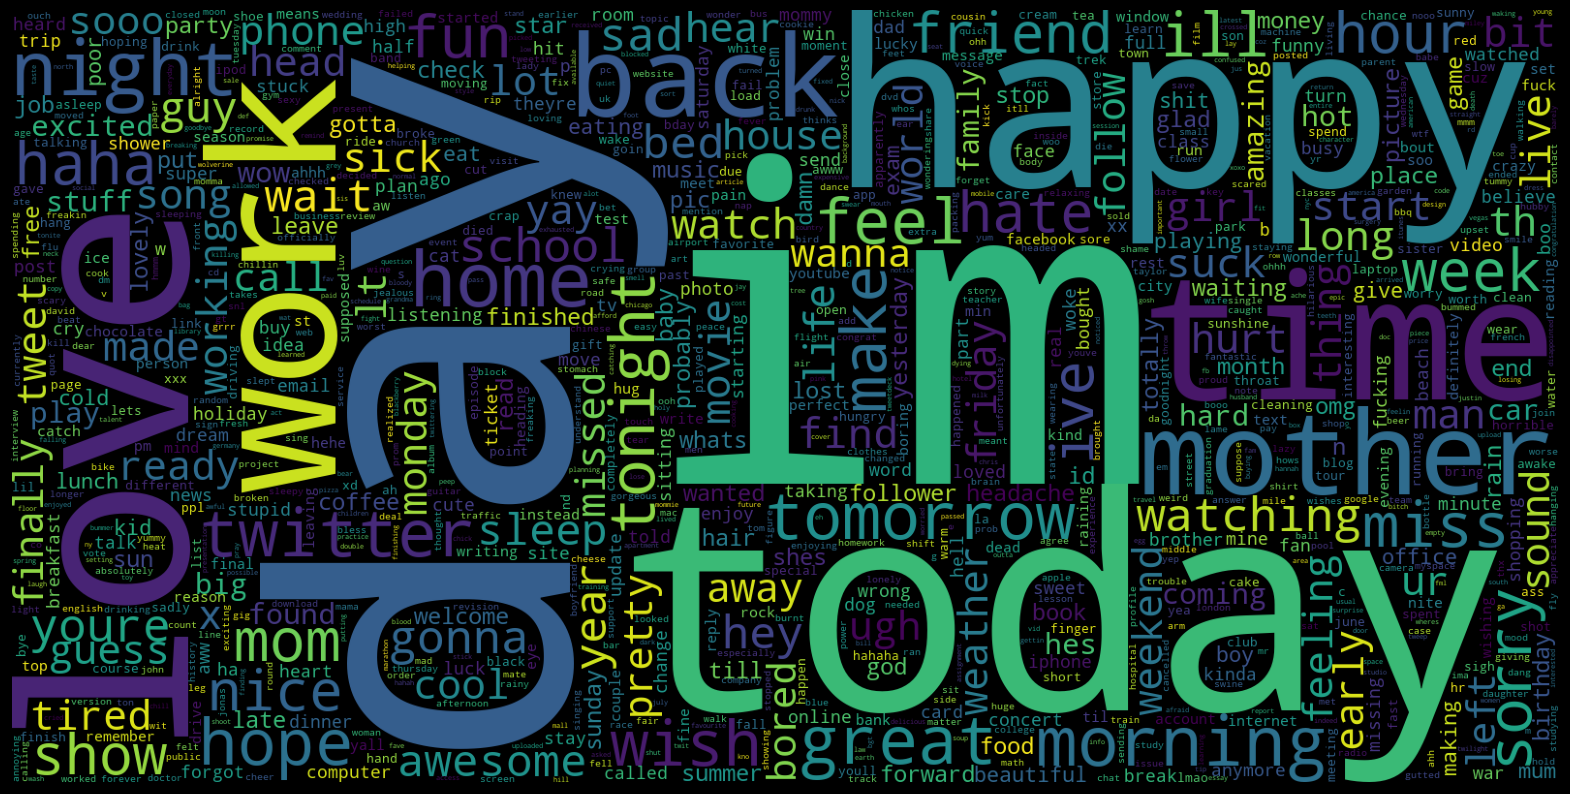

In [69]:

from wordcloud import WordCloud
data = df3["Cleaned_English_contents"]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800, 
               collocations=False).generate(" ".join(data)) 
plt.imshow(wc)
plt.axis("off")
plt.show()

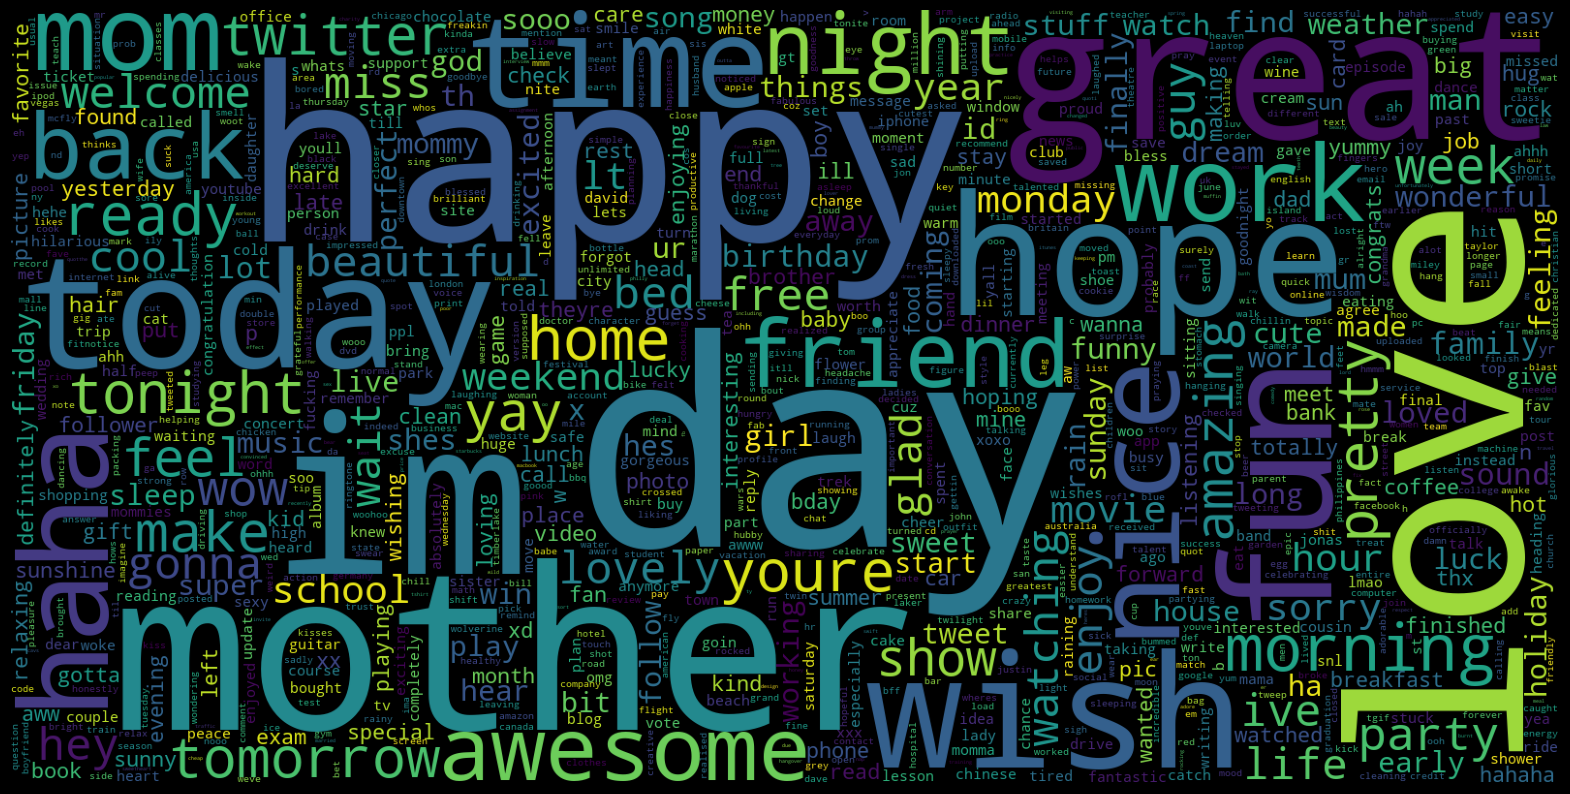

In [70]:
# import word to  view topmost occuring POSITIVE words
data = df3[df3["overall_sentiment"]=="positive"]["Cleaned_English_contents"] 
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data))
plt.imshow(wc)
plt.axis("off")
plt.show()

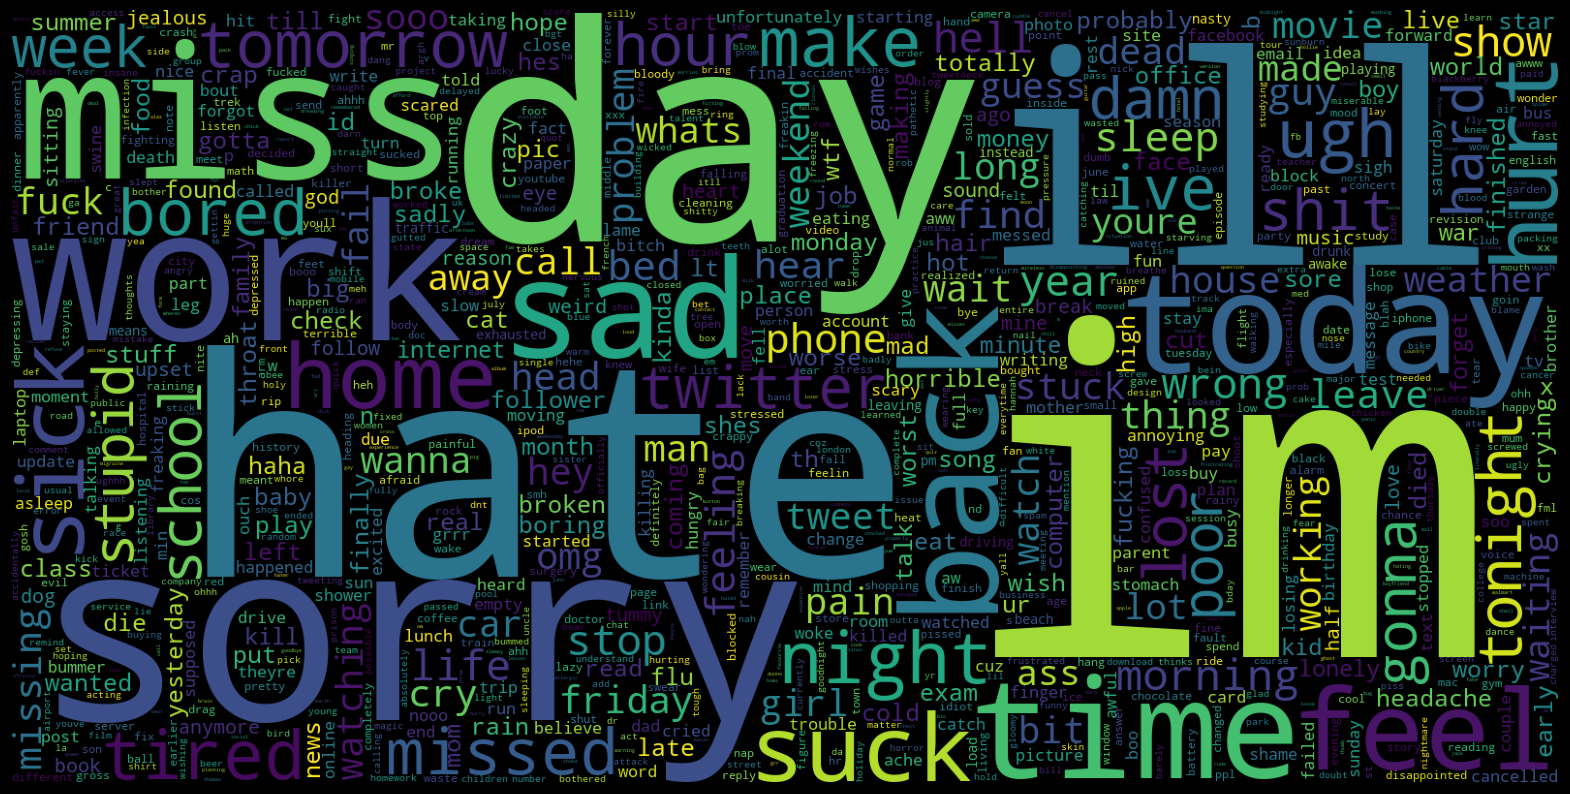

In [71]:
# view topmost occuring negative words
data = df3[df3["overall_sentiment"]=="negative"]["Cleaned_English_contents"] 
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data))
plt.imshow(wc)
plt.axis("off")
plt.show()

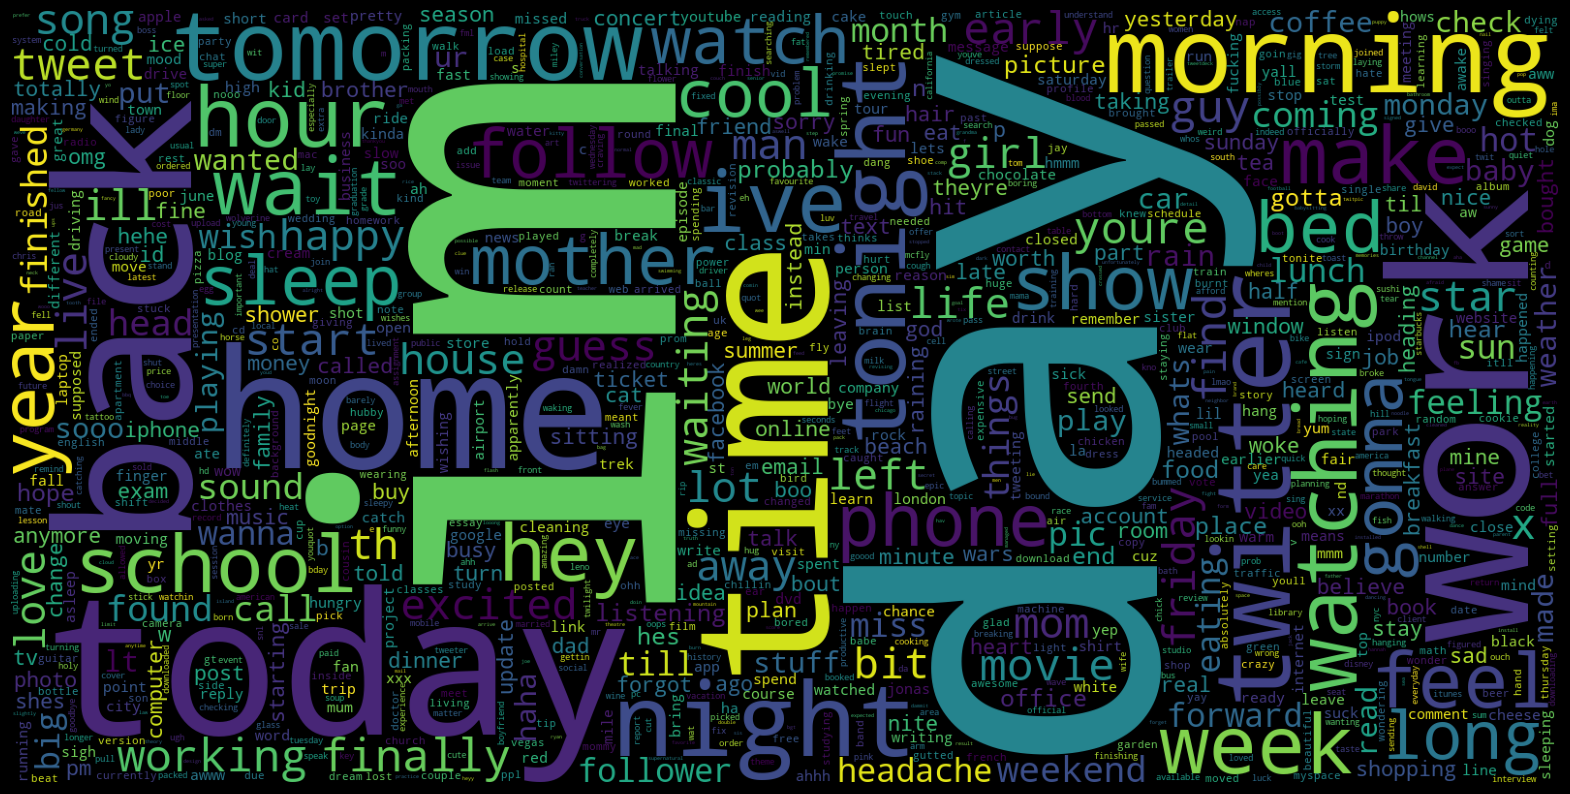

In [72]:
# view topmost occuring neutral words
data = df3[df3["overall_sentiment"]=="neutral"]["Cleaned_English_contents"] 
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data))
plt.imshow(wc)
plt.axis("off")
plt.show()

In [73]:
# getting data ready for modelling
x = df3["Cleaned_English_contents"] 
y = df3["overall_sentiment"]
print(len(x), len(y))

26946 26946


In [74]:
# split our data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42) 
print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

20209 20209
6737 6737


In [75]:
# convert text to numeric data
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer() 
vect.fit(x_train)

CountVectorizer()

In [76]:
# get transformed data
x_train_dtm = vect.transform(x_train) 
x_test_dtm = vect.transform(x_test)

In [77]:
# tune the data
vect_tunned = CountVectorizer(stop_words="english", ngram_range=(1,2), min_df=0.1, max_df=0.7, max_features=100)

In [78]:
# compute word counts
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
tfidf_transformer.fit(x_train_dtm)
x_train_tfidf = tfidf_transformer.transform(x_train_dtm)
x_train_tfidf

<20209x23016 sparse matrix of type '<class 'numpy.float64'>'
	with 123368 stored elements in Compressed Sparse Row format>

In [79]:
# get you target variable
texts = df3["Cleaned_English_contents"] 
target = df3["overall_sentiment"]

In [80]:
#pip install Keras

In [81]:
# import Tokenizer
from keras.preprocessing.text import Tokenizer

In [82]:
#pip install tensorflow

In [83]:
# break to individual words
word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(texts)
vocab_length = len(word_tokenizer.word_index) + 1 
vocab_length

27627

In [84]:
# import libraries for padding
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences 
from nltk.tokenize import word_tokenize

In [85]:
def embed(corpus): 
    return word_tokenizer.texts_to_sequences(corpus)
longest_train = max(texts, key=lambda sentence: len(word_tokenize(sentence))) 
length_long_sentence = len(word_tokenize(longest_train))
train_padded_sentences = pad_sequences( 
    embed(texts), 
    length_long_sentence, 
    padding="post"
)
train_padded_sentences

array([[ 2397,  3702,   468, ...,     0,     0,     0],
       [ 6878,   117,    34, ...,     0,     0,     0],
       [ 2597,  1804,   353, ...,     0,     0,     0],
       ...,
       [    4,     9,     2, ...,     0,     0,     0],
       [ 2590,   166,    59, ...,     0,     0,     0],
       [10306,   661,  2483, ...,     0,     0,     0]])

In [86]:
import numpy as np

In [87]:
embeddings_dictionary = dict() 
embedding_dim = 100
# Load GloVe 100D embeddings
with open("glove.6B.100d.txt", encoding="utf8") as fp:
    for line in fp.readlines():
        records = line.split()
        word = records[0]
        vector_dimensions = np.asarray(records[1:], dtype='float32') 
        embeddings_dictionary [word] = vector_dimensions

In [88]:
from sklearn.naive_bayes import MultinomialNB 
nb = MultinomialNB()
# Train the model
nb.fit(x_train_dtm, y_train)

MultinomialNB()

In [89]:
# getting predictors
y_pred_class = nb.predict(x_test_dtm)
y_pred_prob = nb.predict_proba(x_test_dtm)[:, 1]

In [90]:
#import metrics
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.7571619415169957


In [91]:
# create a pipeline for automation
from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn.pipeline import Pipeline
pipe = Pipeline([("bow", CountVectorizer()), 
                 ("tfid", TfidfTransformer()),  
                 ("model", MultinomialNB())])

In [92]:
# fit pipeline
pipe.fit(x_train, y_train)
y_pred_class = pipe.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred_class))

0.7298500816387116


In [93]:
from sklearn.preprocessing import LabelEncoder

In [94]:
# convert y variable to numeric
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [95]:
# split data
X_train, X_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42)

In [96]:
#pip install xgboost

In [97]:
import xgboost as xgb
pipe = Pipeline([
    ("bow", CountVectorizer()), 
    ("tfid", TfidfTransformer()),  
    ("model", xgb.XGBClassifier( 
        learning_rate=0.1,
        max_depth=7,
        n_estimators=80,
        use_label_encoder=False, 
        eval_metric="auc",
    ))
])

In [98]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfid', TfidfTransformer()),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='auc',
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=7, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=80,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))])

In [99]:
# get predictions
y_pred = pipe.predict(X_test)

In [100]:
# view accuracy score
from sklearn.metrics import accuracy_score 
acc = accuracy_score(y_test, y_pred)
print("Test accuracy:", acc)

Test accuracy: 0.7506493506493507


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:180%;
           font-family:Oswald;
           letter-spacing:0.7px">

<p style= "padding: 5px;
                  color:white;">
    
    
<p style = "text-align:center;"> End of Sentiment Analysis on mother's Day (NLP) 😁😏😣😌😪😐🥱

</p>
</div>